# Problem Session 4
## Regressing Wine Sales

This problem session will be our last time working with a non-time series regression task. It will also be slightly less guided that our previous problem sessions as a skill check for all of the regression topics we have covered so far.

These problems will touch on material from all of the lecture notebooks in the `Regression` folder.

##### 1. Import packages 

First import all of these packages that you may need for this notebook below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## Problem description

You have been hired by Big Steak House, the largest steak house chain east of the Mississippi. They want you to build a model to predict how well a particular type of wine will sell at their 2000 locations across the United States. They have given you the data stored in `wine_sales.csv` in the `Data` folder with which to build a predictive model. Each row of this data set represents a type of wine they sell at one of their locations.

##### 2. Load `wine_sales.csv`

Use `pandas` to load `wine_sales.csv`. How many observations are in this data set?

In [2]:
## Sample Solution
wine = pd.read_csv("../Data/wine_sales.csv")

In [3]:
len(wine)

2000

##### 3. Train test split

Make a train test split before doing any EDA.

In [4]:
## Sample Solution
from sklearn.model_selection import train_test_split

In [5]:
wine_train, wine_test = train_test_split(wine.copy(),
                                            shuffle=True,
                                            random_state=332,
                                            test_size = .25)

##### 4. Look at the data

Here are descriptions of each of the columns for this data set:
- `red`: is this wine a red wine, or a white wine? A value of `1` denotes a red wine, a value of `0` denotes a white wine.
- `local`: does this wine come from a local or national winery? A value of `1` denotes a wine from a local winery, a value of `0` denotes a wine from a national winery.
- `menu_location`: where is the wine listed on the menu? `'top'` denotes the top of the menu, `'middle'` denotes the middle of the menu, `'bottom'` denotes the bottom of the menu
- `price`: the price per bottle of wine for this wine.
- `comp_price`: the price per bottle of wine for this wine at the closest competitor.
- `abv`: the alcohol by volume for this wine.
- `avg_temp`: the average temperature for this location.
- `population`: the population for the area in which the steakhouse is located.
- `sales`: the unit sales for this type of wine.

Do whatever exploration you would like of these columns here. Should you use just the training set, just the test set or both for this exploration?

In [6]:
### Sample Solution
wine_train.head()

,red,local,menu_location,price,comp_price,abv,avg_temp,population,sales
28,0.0,1.0,bottom,88.83,94.46,8.8,78.11,115.63,67.76
1299,1.0,0.0,middle,46.69,54.47,18.2,79.42,115.82,99.25
694,0.0,1.0,bottom,109.13,107.21,6.9,78.08,112.27,54.87
1051,0.0,1.0,middle,-8.09,32.81,15.5,78.70,99.98,48.64
368,0.0,1.0,top,22.56,41.27,5.2,83.02,59.98,55.08


In [7]:
wine_train.describe()

,red,local,price,comp_price,abv,avg_temp,population,sales
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.592667,0.302667,56.119213,56.305607,12.920400,80.077173,73.932600,67.486807
std,0.491502,0.459565,32.871477,35.258157,5.059897,3.189693,31.786569,20.134942
min,0.000000,0.000000,-8.090000,-33.770000,4.000000,70.220000,20.010000,27.550000
25%,0.000000,0.000000,30.010000,29.687500,8.800000,77.887500,46.367500,52.450000
50%,1.000000,0.000000,42.565000,42.345000,13.100000,80.070000,74.100000,61.925000
75%,1.000000,1.000000,88.600000,86.770000,17.225000,82.192500,100.960000,84.040000
max,1.000000,1.000000,148.250000,164.020000,22.000000,90.300000,129.840000,121.030000


##### 5. EDA

Do some exploratory data analysis with the training set to get some ideas for any potential relationships between `sales` and the features.

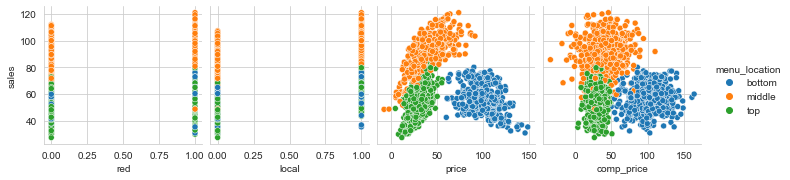

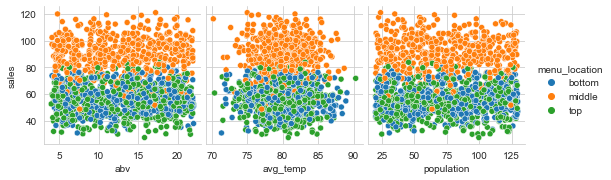

In [8]:
### Sample Solution
sns.pairplot(data=wine_train, 
             hue='menu_location',
             y_vars = ['sales'],
             x_vars = ['red', 'local', 'price', 'comp_price'])

plt.show()

sns.pairplot(data=wine_train, 
             hue='menu_location',
             y_vars = ['sales'],
             x_vars = ['abv', 'avg_temp', 'population'])

plt.show()

In [9]:
print("local")
print("----------------")
print("Mean")
print(wine_train.groupby('local').sales.mean())
print("Median")
print(wine_train.groupby('local').sales.median())


print()
print()

print("red")
print("----------------")
print("Mean")
print(wine_train.groupby('red').sales.mean())
print("Median")
print(wine_train.groupby('red').sales.median())

print()
print()

print("menu_location")
print("----------------")
print("Mean")
print(wine_train.groupby('menu_location').sales.mean())
print("Median")
print(wine_train.groupby('menu_location').sales.median())



local
----------------
Mean
local
0.0    63.478327
1.0    76.722203
Name: sales, dtype: float64
Median
local
0.0    57.755
1.0    71.490
Name: sales, dtype: float64


red
----------------
Mean
red
0.0    60.752799
1.0    72.115017
Name: sales, dtype: float64
Median
red
0.0    54.08
1.0    67.40
Name: sales, dtype: float64


menu_location
----------------
Mean
menu_location
bottom    56.404351
middle    90.736353
top       54.650614
Name: sales, dtype: float64
Median
menu_location
bottom    56.740
middle    90.795
top       54.430
Name: sales, dtype: float64


##### 6. `price` and `sales`

Take a close look at the relationship between `sales` and `price`. Does it look like we should make any  transformations for this data set?

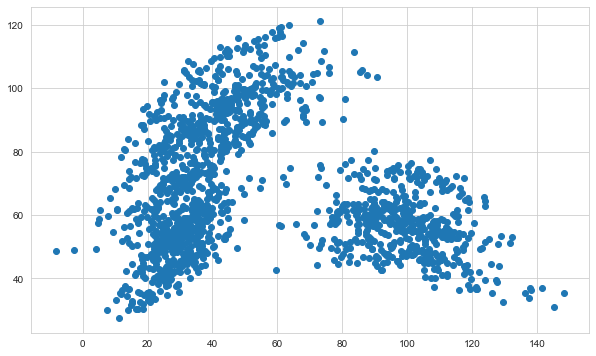

In [10]:
#### Sample Solution
plt.figure(figsize=(10,6))

plt.scatter(wine_train.price,
               wine_train.sales)

plt.show()

##### 6. Initial Modeling

Discuss among your group and choose some models to test, choose at least 4 models to try, and be sure to include a baseline. Write your models down below.

##### Sample Solution

##### Here are four potential models

$$
\text{sales} = E(\text{sales}) + \epsilon
$$

$$
\text{sales} = \beta_0 + \beta_1 \text{price} + \beta_2 \text{price}^2 + \epsilon
$$

$$
\text{sales} = \beta_0 + \beta_1 \text{price} + \beta_2 \text{price}^2 + \beta_3 \text{local} + \epsilon
$$

$$
\text{sales} = \beta_0 + \beta_1 \text{price} + \beta_2 \text{price}^2 + \beta_3 \text{local} + \beta_4 \text{menu_middle} + \beta_5 \text{menu_bottom} + \epsilon
$$

##### 7. Data preprocessing.

Prepare your training data by making any new columns you may need. For example, you may need one-hot encoded variables, polynomial transformations, nonlinear transformations or interaction terms.

In [11]:
## Sample Solution
## Here are some things you may want to do
wine_train[['menu_middle', 'menu_bottom']] = pd.get_dummies(wine_train['menu_location'])[['middle', 'bottom']]

wine_train['price_sq'] = wine_train['price']**2

wine_train['local_price'] = wine_train['price']*wine_train['local']

##### 8. CV

Using 10-fold cross-validation, find which one of the models you chose in 6. you think will perform the best.

##### a. Import functions/objects

Import the packages you will need, define or import a function to calculate the mse.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

##### b. Implement CV

Implement the cross-validation below.

In [13]:
kfold = KFold(n_splits=10, shuffle=True, random_state=4530)

In [14]:
models = ['baseline',
             ['price', 'price_sq'],
             ['price', 'price_sq', 'local'],
             ['price', 'price_sq', 'local', 'menu_middle', 'menu_bottom']]

In [15]:
cv_mses = np.zeros((10, len(models)))


i = 0
for train_index, test_index in kfold.split(wine_train):
    wine_train_train = wine_train.iloc[train_index]
    wine_holdout = wine_train.iloc[test_index]
    j = 0
    for model in models:
        if model == "baseline":
            train_mean = wine_train_train.sales.mean()
            cv_mses[i,j] = mean_squared_error(wine_holdout.sales, train_mean*np.ones(len(wine_holdout)))
        else:
            reg = LinearRegression(copy_X = True)
            reg.fit(wine_train_train[model], wine_train_train.sales)
            cv_mses[i,j] = mean_squared_error(wine_holdout.sales, reg.predict(wine_holdout[model]))
        j = j + 1
    i = i + 1

##### d. Lowest CV MSE?

Which model of yours had the lowest average cross-validation mean squared error?

In [16]:
models[np.argmin(np.mean(cv_mses, axis=0))]

['price', 'price_sq', 'local', 'menu_middle', 'menu_bottom']

##### 9. More modeling

If you have time remaining try to see if you can improve upon your model.

You could try to implement forwards selection, backwards selection, best subsets or lasso regression for feature selection. (see `9. Feature Selection Approaches.ipynb`).

It may also be worthwhile to examine residual plots for more model ideas (see `8. Linear Regression Diagnostic Plots.ipynb`).

The best model will be:

$$
\text{sales} = \beta_0 + \beta_1 \text{red} + \beta_2 \text{price} + \beta_3 \text{price}^2 + \beta_4 \text{local} + \beta_5 \text{local} \times \text{price} + \beta_6 \text{menu_middle} + \beta_7 \text{menu_bottom} + \epsilon.
$$

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)